In [5]:
# ===============================
# İyileştirilmiş Meyve Olgunluk Tahmin Modeli
# ===============================

import numpy as np
import pandas as pd
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt


In [6]:
# ===============================
# 1. Excel verisini oku
# ===============================
df = pd.read_excel (r"C:\Users\user\Downloads\Hass Avocado Ripening Photographic Dataset\Hass Avocado Ripening Photographic Dataset\Avocado Ripening Dataset.xlsx")   # kendi dosya adını yaz
image_dir = (r"C:\Users\user\Downloads\Hass Avocado Ripening Photographic Dataset\Hass Avocado Ripening Photographic Dataset\Avocado Ripening Dataset")  # fotoğraf klasörün



Stage 4'e ulaşan sample sayısı: 426
Toplam sample sayısı: 478

Veri hazırlama özeti:
Geçerli örnekler: 14140
Atlanan örnekler: 582

Kalan gün dağılımı:
0.0 gün: 6158 örnek
1.0 gün: 852 örnek
2.0 gün: 850 örnek
3.0 gün: 852 örnek
4.0 gün: 834 örnek
5.0 gün: 762 örnek
6.0 gün: 656 örnek
7.0 gün: 470 örnek
8.0 gün: 338 örnek
9.0 gün: 326 örnek
10.0 gün: 320 örnek
11.0 gün: 306 örnek
12.0 gün: 298 örnek
13.0 gün: 272 örnek
14.0 gün: 260 örnek
15.0 gün: 236 örnek
16.0 gün: 212 örnek
17.0 gün: 106 örnek
18.0 gün: 30 örnek
19.0 gün: 2 örnek

Sınıf dağılımı:
Stage 1: 3218 örnek
Stage 2: 2108 örnek
Stage 3: 2656 örnek
Stage 4: 3294 örnek
Stage 5: 2864 örnek

Kalan gün istatistikleri:
Min: 0.0, Max: 19.0, Ortalama: 3.66

Eğitim seti boyutu: 11312
Test seti boyutu: 2828


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ sequential_1 (Sequential)     │ (None, 224, 224, 3)       │               0 │ input_layer_4[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ mobilenetv2_1.00_224          │ (None, 7, 7, 1280)        │       2,257,984 │ sequential_1[0][0]         │
│ (Functional)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ global_average_pooling2d_1    │ (None, 1280)              │               0 │ mobilenetv2_1.00_224[0][0] │
│ (GlobalAveragePooling2D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_5 (Dense)               │ (None, 512)               │         655,872 │ global_average_pooling2d_… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_2         │ (None, 512)               │           2,048 │ dense_5[0][0]              │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_5 (Dropout)           │ (None, 512)               │               0 │ batch_normalization_2[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_6 (Dense)               │ (None, 256)               │         131,328 │ dropout_5[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_3         │ (None, 256)               │           1,024 │ dense_6[0][0]              │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_6 (Dropout)           │ (None, 256)               │               0 │ batch_normalization_3[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_7 (Dense)               │ (None, 128)               │          32,896 │ dropout_6[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_7 (Dropout)           │ (None, 128)               │               0 │ dense_7[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ classification (Dense)        │ (None, 5)                 │             645 │ dropout_7[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 261)               │               0 │ dropout_6[0][0],           │
│                               │                           │                 │ classification[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_8 (Dense)               │ (None, 256)               │          67,07

 Total params: 3,181,894 (12.14 MB)

 Trainable params: 922,374 (3.52 MB)

 Non-trainable params: 2,259,520 (8.62 MB)

Model eğitimi başlıyor...
Epoch 1/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 113s 597ms/step - classification_accuracy: 0.5106 - classification_loss: 1.1256 - loss: 2.9538 - regression_loss: 1.8993 - regression_mae: 1.8987 - val_classification_accuracy: 0.5446 - val_classification_loss: 0.9861 - val_loss: 2.8531 - val_regression_loss: 1.8869 - val_regression_mae: 1.8838 - learning_rate: 0.0010
Epoch 2/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 99s 560ms/step - classification_accuracy: 0.5513 - classification_loss: 0.9771 - loss: 2.7536 - regression_loss: 1.8057 - regression_mae: 1.8062 - val_classification_accuracy: 0.5438 - val_classification_loss: 1.0462 - val_loss: 2.8458 - val_regression_loss: 1.8612 - val_regression_mae: 1.8507 - learning_rate: 0.0010
Epoch 3/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 100s 567ms/step - classification_accuracy: 0.5732 - classification_loss: 0.9341 - loss: 2.6734 - regression_loss: 1.7609 - regression_mae: 1.7607 - val_classification_accuracy: 0.5364 - val_classification_loss: 1.07

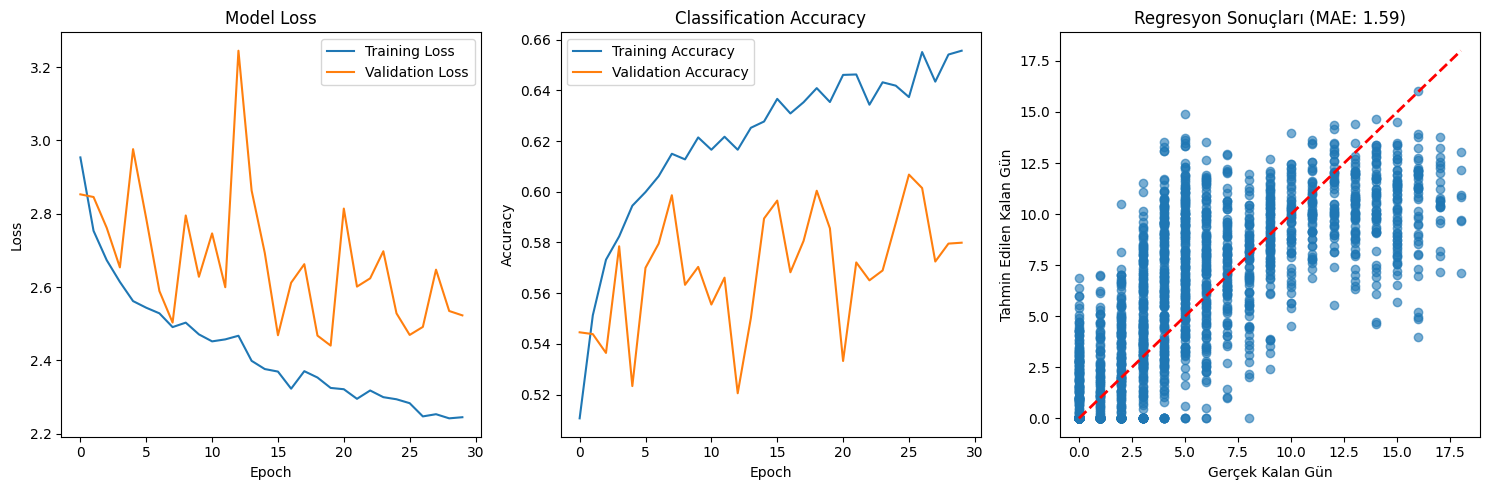


Model kaydedildi: mobilenetv2_multitask_model_improved.keras


In [7]:
# ===============================
# İyileştirilmiş Meyve Olgunluk Tahmin Modeli
# ===============================

import numpy as np
import pandas as pd
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# ===============================
# 1. Veri Hazırlama ve Kalite Kontrolü
# ===============================

def prepare_data(df, image_dir):
    X, y_classification, y_regression = [], [], []
    
    # Stage 4'e ulaşan sample'ları tespit et (ilk kez 4'e ulaştığı gün)
    stage_4_days = df[df["Ripening Index Classification"] == 4] \
        .groupby("Sample")["Day of Experiment"].min().to_dict()
    
    print(f"Stage 4'e ulaşan sample sayısı: {len(stage_4_days)}")
    print(f"Toplam sample sayısı: {df['Sample'].nunique()}")
    
    valid_samples = 0
    skipped_samples = 0
    
    for idx, row in df.iterrows():
        sample_id = row["Sample"]
        current_day = int(row["Day of Experiment"])
        current_stage = int(row["Ripening Index Classification"])
        
        # Kalan gün hesaplama
        if sample_id in stage_4_days:
            stage_4_day = int(stage_4_days[sample_id])
            days_left = max(0, stage_4_day - current_day)
            
            # Mantık kontrolü: Eğer şu anki stage 4 veya üzeri ise, kalan gün 0 olmalı
            if current_stage >= 4:
                days_left = 0
            
            file_name = row["File Name"] + ".jpg"
            image_path = os.path.join(image_dir, file_name)
            
            if os.path.exists(image_path):
                try:
                    img = cv2.imread(image_path)
                    if img is not None:
                        img = cv2.resize(img, (224, 224))
                        img = preprocess_input(img)
                        X.append(img)
                        
                        # Sınıflandırma: 1-5 arası değerleri 0-4 arasına çevir
                        y_classification.append(current_stage - 1)
                        
                        # Regresyon: kalan gün (normalizasyon için log transform deneyebiliriz)
                        y_regression.append(days_left)
                        valid_samples += 1
                    else:
                        print(f"Görüntü okunamadı: {image_path}")
                        skipped_samples += 1
                except Exception as e:
                    print(f"Hata ({image_path}): {e}")
                    skipped_samples += 1
            else:
                skipped_samples += 1
        else:
            # Bu sample stage 4'e hiç ulaşmamış, atlayalım
            skipped_samples += 1
    
    print(f"\nVeri hazırlama özeti:")
    print(f"Geçerli örnekler: {valid_samples}")
    print(f"Atlanan örnekler: {skipped_samples}")
    
    X = np.array(X, dtype=np.float32)
    y_classification = np.array(y_classification, dtype=np.int32)
    y_regression = np.array(y_regression, dtype=np.float32)
    
    # Regresyon verisi için ağırlıklı örnekleme (yüksek gün değerlerini artır)
    print(f"\nKalan gün dağılımı:")
    days_unique, days_counts = np.unique(y_regression, return_counts=True)
    for day, count in zip(days_unique, days_counts):
        print(f"{day} gün: {count} örnek")
    
    # Veri dağılımını kontrol et
    print(f"\nSınıf dağılımı:")
    unique, counts = np.unique(y_classification, return_counts=True)
    for class_idx, count in zip(unique, counts):
        print(f"Stage {class_idx + 1}: {count} örnek")
    
    print(f"\nKalan gün istatistikleri:")
    print(f"Min: {y_regression.min()}, Max: {y_regression.max()}, Ortalama: {y_regression.mean():.2f}")
    
    return X, y_classification, y_regression
    X, y_classification, y_regression = [], [], []
    
    # Stage 4'e ulaşan sample'ları tespit et (ilk kez 4'e ulaştığı gün)
    stage_4_days = df[df["Ripening Index Classification"] == 4] \
        .groupby("Sample")["Day of Experiment"].min().to_dict()
    
    # Stage 5'e ulaşan sample'ları da kontrol et
    stage_5_days = df[df["Ripening Index Classification"] == 5] \
        .groupby("Sample")["Day of Experiment"].min().to_dict()
    
    print(f"Stage 4'e ulaşan sample sayısı: {len(stage_4_days)}")
    print(f"Stage 5'e ulaşan sample sayısı: {len(stage_5_days)}")
    print(f"Toplam sample sayısı: {df['Sample'].nunique()}")
    
    # Stage 4'e ulaşmayan sample'ları analiz et
    non_stage4_samples = set(df['Sample'].unique()) - set(stage_4_days.keys())
    print(f"Stage 4'e ulaşmayan sample sayısı: {len(non_stage4_samples)}")
    
    if non_stage4_samples:
        # Bu sample'ların max stage'lerini kontrol et
        max_stages = df[df['Sample'].isin(non_stage4_samples)].groupby('Sample')['Ripening Index Classification'].max()
        print("Stage 4'e ulaşmayan sample'ların maksimum stage'leri:")
        for sample, max_stage in max_stages.items():
            print(f"  Sample {sample}: Max stage {max_stage}")
    
    valid_samples = 0
    skipped_samples = 0
    regression_method_1 = 0  # Stage 4'e ulaşan sample'lar
    regression_method_2 = 0  # Stage 4'e ulaşmayan ama yüksek stage'de olan sample'lar
    
    for idx, row in df.iterrows():
        sample_id = row["Sample"]
        current_day = int(row["Day of Experiment"])
        current_stage = int(row["Ripening Index Classification"])
        
        days_left = -1  # Varsayılan değer
        
        # Method 1: Stage 4'e ulaşan sample'lar için kesin hesaplama
        if sample_id in stage_4_days:
            stage_4_day = int(stage_4_days[sample_id])
            days_left = max(0, stage_4_day - current_day)
            
            # Mantık kontrolü: Eğer şu anki stage 4 veya üzeri ise, kalan gün 0 olmalı
            if current_stage >= 4:
                days_left = 0
            
            regression_method_1 += 1
            
        # Method 2: Stage 4'e ulaşmayan ama stage 3'te olan sample'lar için tahmini hesaplama
        elif current_stage == 3:
            # Ortalama stage 3'ten stage 4'e geçiş süresini hesapla
            stage_3_to_4_duration = []
            for s_id in stage_4_days.keys():
                stage_3_data = df[(df['Sample'] == s_id) & (df['Ripening Index Classification'] == 3)]
                if not stage_3_data.empty:
                    stage_3_last_day = stage_3_data['Day of Experiment'].max()
                    duration = stage_4_days[s_id] - stage_3_last_day
                    if duration > 0:
                        stage_3_to_4_
    
    print(f"\nVeri hazırlama özeti:")
    print(f"Geçerli örnekler: {valid_samples}")
    print(f"Atlanan örnekler: {skipped_samples}")
    
    X = np.array(X, dtype=np.float32)
    y_classification = np.array(y_classification, dtype=np.int32)
    y_regression = np.array(y_regression, dtype=np.float32)
    
    # Veri dağılımını kontrol et
    print(f"\nSınıf dağılımı:")
    unique, counts = np.unique(y_classification, return_counts=True)
    for class_idx, count in zip(unique, counts):
        print(f"Stage {class_idx + 1}: {count} örnek")
    
    print(f"\nKalan gün istatistikleri:")
    print(f"Min: {y_regression.min()}, Max: {y_regression.max()}, Ortalama: {y_regression.mean():.2f}")
    
    return X, y_classification, y_regression

# Veri hazırlama
X, y_classification, y_regression = prepare_data(df, image_dir)

# Eğitim ve test setlerini ayırma
X_train, X_test, y_clf_train, y_clf_test, y_reg_train, y_reg_test = train_test_split(
    X, y_classification, y_regression, test_size=0.2, random_state=42, stratify=y_classification
)

print(f"\nEğitim seti boyutu: {len(X_train)}")
print(f"Test seti boyutu: {len(X_test)}")

# ===============================
# 2. Veri Augmentation
# ===============================
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.1),  # Daha az rotasyon
    RandomZoom(0.1)       # Daha az zoom
])

# ===============================
# 3. Model Oluşturma
# ===============================
def create_model():
    base_model = MobileNetV2(
        input_shape=(224, 224, 3),
        include_top=False,
        weights="imagenet"
    )
    base_model.trainable = False
    
    # Giriş
    base_input = layers.Input(shape=(224, 224, 3))
    
    # Veri artırma (sadece eğitim sırasında)
    x = data_augmentation(base_input)
    
    # Özellik çıkarıcı
    x = base_model(x, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    
    # Paylaşılan katmanlar
    x = layers.Dense(512, activation="relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(256, activation="relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)
    
    # Sınıflandırma dalı
    clf_branch = layers.Dense(128, activation="relu")(x)
    clf_branch = layers.Dropout(0.2)(clf_branch)
    classification_output = layers.Dense(5, activation='softmax', name='classification')(clf_branch)
    
    # Regresyon dalı - sınıflandırma ile birleştirilmiş
    reg_input = layers.Concatenate()([x, classification_output])  # Stage bilgisini ekle
    reg_branch = layers.Dense(256, activation="relu")(reg_input)
    reg_branch = layers.Dropout(0.2)(reg_branch)
    reg_branch = layers.Dense(128, activation="relu")(reg_branch)
    reg_branch = layers.Dropout(0.2)(reg_branch)
    
    # Stage'e göre farklı activation
    regression_output = layers.Dense(1, activation='relu', name='regression')(reg_branch)
    
    model = Model(inputs=base_input, outputs=[classification_output, regression_output])
    
    return model

# Model oluştur
model = create_model()

# Model özetini göster
model.summary()

# ===============================
# 4. Compile
# ===============================
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss={
        'classification': 'sparse_categorical_crossentropy',
        'regression': 'mae'  # MAE kullan (daha stabil)
    },
    metrics={
        'classification': ['accuracy'],
        'regression': ['mae']
    },
    loss_weights={'classification': 0.6, 'regression': 1.2}  # Daha dengeli ağırlık
)

# ===============================
# 5. Callback'ler
# ===============================
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-7
    )
]

# ===============================
# 6. Eğitim
# ===============================
print("Model eğitimi başlıyor...")

history = model.fit(
    X_train, 
    {"classification": y_clf_train, "regression": y_reg_train},
    validation_data=(X_test, {"classification": y_clf_test, "regression": y_reg_test}),
    epochs=30,  # Büyük dataset için daha az epoch yeterli
    batch_size=64,  # Büyük dataset için daha büyük batch size
    callbacks=callbacks,
    verbose=1
)

# ===============================
# 7. Değerlendirme
# ===============================
def evaluate_model(model, X_test, y_clf_test, y_reg_test):
    # Tahmin
    predictions = model.predict(X_test)
    y_clf_pred = np.argmax(predictions[0], axis=1)
    y_reg_pred = predictions[1].flatten()
    
    print("=== SINIFLANDIRMA SONUÇLARI ===")
    print(classification_report(y_clf_test, y_clf_pred, 
                               target_names=[f'Stage {i+1}' for i in range(5)]))
    
    print("\n=== REGRESYON SONUÇLARI ===")
    mae = mean_absolute_error(y_reg_test, y_reg_pred)
    r2 = r2_score(y_reg_test, y_reg_pred)
    print(f"Mean Absolute Error: {mae:.2f} gün")
    print(f"R² Score: {r2:.3f}")
    
    # Grafik gösterimi
    plt.figure(figsize=(15, 5))
    
    # Loss grafiği
    plt.subplot(1, 3, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    # Sınıflandırma accuracy
    plt.subplot(1, 3, 2)
    plt.plot(history.history['classification_accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_classification_accuracy'], label='Validation Accuracy')
    plt.title('Classification Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Regresyon scatter plot
    plt.subplot(1, 3, 3)
    plt.scatter(y_reg_test, y_reg_pred, alpha=0.6)
    plt.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], 'r--', lw=2)
    plt.xlabel('Gerçek Kalan Gün')
    plt.ylabel('Tahmin Edilen Kalan Gün')
    plt.title(f'Regresyon Sonuçları (MAE: {mae:.2f})')
    
    plt.tight_layout()
    plt.show()

# Model değerlendirmesi
evaluate_model(model, X_test, y_clf_test, y_reg_test)

# ===============================
# 8. Modeli Kaydetme
# ===============================
model.save("mobilenetv2_multitask_model_improved.keras")
print("\nModel kaydedildi: mobilenetv2_multitask_model_improved.keras")

# ===============================
# 9. Tek Resim Tahmin Fonksiyonu
# ===============================
def predict_single_image(image_path, model):
    """
    Tek bir resim için tahmin yapar
    """
    try:
        img = cv2.imread(image_path)
        if img is None:
            return None, None
        
        img = cv2.resize(img, (224, 224))
        img = preprocess_input(img)
        img = np.expand_dims(img, axis=0)
        
        predictions = model.predict(img, verbose=0)
        
        # Sınıflandırma tahmini
        class_pred = np.argmax(predictions[0]) + 1  # 1-5 arasına dönüştür
        class_conf = np.max(predictions[0]) * 100
        
        # Regresyon tahmini
        days_left = max(0, predictions[1][0][0])  # Negatif değerleri 0 yap
        
        return {
            'predicted_stage': class_pred,
            'confidence': class_conf,
            'days_to_ripeness': round(days_left, 1)
        }, None
        
    except Exception as e:
        return None, str(e)

# Örnek kullanım
# result, error = predict_single_image("path/to/your/image.jpg", model)
# if result:
#     print(f"Tahmin edilen aşama: {result['predicted_stage']}")
#     print(f"Güven: {result['confidence']:.1f}%")
#     print(f"Olgunluğa kalan gün: {result['days_to_ripeness']}")
# else:
#     print(f"Hata: {error}")

In [23]:
result, error = predict_single_image(r"C:\Users\user\Downloads\images (2).jpeg", model)
if result:
    print(f"Tahmin edilen aşama: {result['predicted_stage']}")
    print(f"Güven: {result['confidence']:.1f}%")
    print(f"Olgunluğa kalan gün: {result['days_to_ripeness']}")
else:
    print(f"Hata: {error}")

Tahmin edilen aşama: 4
Güven: 62.0%
Olgunluğa kalan gün: 0
